This notebook is about the chance a kid raised in Shanghai can get into Fudan University (FDU) and Shanghai Jiao Tong University (SJTU), the two most prestigious universities in Shanghai. The purpose is to showcase how we can use Python to do **Action-Driven Analytics** in pragmatic data science. We simulate the data and replicate the results in [this article](https://mp.weixin.qq.com/s/bpXBeELdji1K7XXTEsJVjQ). 

Putting ourselves into the shoes of a parent or a government officer in K12 education, we first think about what kind of data analytics results could lead to some **actions** of these stakeholders. For a parent, what s/he really cares about is what to do when his/her child is young to increase the likelihood of getting into FDU or SJTU? On the other hand, a education policy maker from Shanghai cares about whether any changes to the admission policy of each stage (elementary school, middle school, and high-school) are needed so that the students who get into the elite universities are efficiently and fairly selected. 

Let's begin our journey, getting started with importing the data and the necessary packages.

In [1]:
# Import the NumPy, Matplotlib and Pandas packages.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

We then load 4 different data sets into Python. The first data set contains all the students who entered elementary schools in **2012**.

In [2]:
# The dataframe for elementary school students.

data_elementary = pd.read_csv("data_elementary.csv")

Take a look at the first few rows of this data.

In [3]:
data_elementary.head(10)

,Students ID,Name,Gender,Elementary School
0,2012000000,Jiaru Yu,Female,Private
1,2012000001,Qianhong Han,Female,Public
2,2012000002,Jiayan Zhou,Female,Public
3,2012000003,Ling Wu,Male,Public
4,2012000004,Ziming Hua,Male,Public
5,2012000005,Fangbo Chen,Female,Public
6,2012000006,Xuan Guan,Male,Public
7,2012000007,Zhanfang Wang,Female,Public
8,2012000008,Ziyao Xu,Male,Public
9,2012000009,Yongna Zhu,Female,Public


In [4]:
data_elementary.shape

(172297, 4)

There are 172,297 students in total, each with a unique ``Student ID`` as the identifier across different data sets. Furthermore, we know whether the student entered a private or public elementary school. We now load the data of the students who entered middle schools in **2017**.

In [5]:
data_middle = pd.read_csv("data_middle_high_school.csv")

data_middle = data_middle.drop(columns=['Unnamed: 0'])

data_middle.head(10)

,Students ID,Name,Gender,Middle High School
0,2012000000,Jiaru Yu,Female,Private
1,2012000001,Qianhong Han,Female,Private
2,2012000002,Jiayan Zhou,Female,Private
3,2012000003,Ling Wu,Male,Public
4,2012000004,Ziming Hua,Male,Public
5,2012000005,Fangbo Chen,Female,Private
6,2012000006,Xuan Guan,Male,Public
7,2012000007,Zhanfang Wang,Female,Public
8,2012000008,Ziyao Xu,Male,Public
9,2012000009,Yongna Zhu,Female,Public


In [6]:
data_middle.shape

(172297, 4)

In [7]:
# Load the high school data.

data_high = pd.read_csv("data_high_school.csv")

data_high = data_high.drop(columns=['Unnamed: 0'])

data_high.head(10)

,Students ID,Name,Gender,High School,Class Number,Quota or Self
0,2012000000,Jiaru Yu,Female,Other high schools,NaN,NaN
1,2012000001,Qianhong Han,Female,Not_in_shanghai,NaN,NaN
2,2012000002,Jiayan Zhou,Female,Other high schools,NaN,NaN
3,2012000003,Ling Wu,Male,Not_in_shanghai,NaN,NaN
4,2012000004,Ziming Hua,Male,Other high schools,NaN,NaN
5,2012000005,Fangbo Chen,Female,Other key high schools,NaN,NaN
6,2012000006,Xuan Guan,Male,Other high schools,NaN,NaN
7,2012000007,Zhanfang Wang,Female,Other key high schools,NaN,NaN
8,2012000008,Ziyao Xu,Male,Not_in_shanghai,NaN,NaN
9,2012000009,Yongna Zhu,Female,Other high schools,NaN,NaN


In [8]:
data_high.shape

(159133, 6)

In [9]:
data_high['High School'].unique()

array(['Other high schools', 'Not_in_shanghai', 'Other key high schools',
       'Shanghai Weiyu Middle School',
       'Fudan University Affiliated Middle School',
       'Shanghai Songjiang No. 2 Middle School',
       'Shanghai Datong Middle School', 'Shanghai Fuxing High School',
       'Fudan University Affiliated Middle School (Qingpu Campus)',
       'Shanghai Nanyang Model High School',
       'Shanghai Experimental Middle School',
       'Shanghai Gezhi High School', 'Shanghai Jianping Middle School',
       'Fudan University Affiliated Middle School (Xuhui Campus)',
       'East China Normal University Second Affiliated Middle School',
       'Shanghai Jiao Tong University Affiliated Middle School',
       'East China Normal University Second Affiliated Middle School (Baoshan Campus)',
       'East China Normal University Second Affiliated Middle School (Songjiang Campus)',
       'Shanghai Kongjiang Middle School',
       'Shanghai Jincai Middle School',
       'East China N

"`Other high schools`" means the normal high schools in Shanghai; "`Other key high schools`" means the good but not elite high schools in Shanghai; "`Not_in_shanghai`" means the high school is not in Shanghai.


As we can see, the high school data has some specific information about whether and which elite high school the student entered. In particular, we can classify the high-schools into 3 tiers:

- **Tier 1:** "四校和实验" in Chinese, i.e., 
  - Shanghai High School 
  - Shanghai Jiao Tong University Affiliated Middle School 
  - Fudan University Affiliated Middle School 
  - East China Normal University Second Affiliated Middle School 
  - Shanghai Experimental Middle School
- **Tier 2:** "四分或七宝" in Chinese, i.e., 
  - East China Normal University Second Affiliated Middle School (Zizhu Campus) 
  - East China Normal University Second Affiliated Middle School (Baoshan Campus)
  - East China Normal University Second Affiliated Middle School (Putuo Campus)
  - East China Normal University Second Affiliated Middle School (Songjiang Campus)
  - East China Normal University Second Affiliated Middle School (Lingang Fengxian Campus)
  - Fudan University Affiliated Middle School (Qingpu Campus)
  - Fudan University Affiliated Middle School, Pudong Branch
  - Fudan University Affiliated Middle School (Xuhui Campus)
  - Shanghai Jiao Tong University Affiliated Middle School (Minhang Campus)
  - Shanghai Jiao Tong University Affiliated Middle School (Jiading Campus)
  - Shanghai Qibao Middle School
- **Tier 3:** "八大五虎" in Chinese, i.e.,
  - Shanghai Jianping Middle School 
  - Shanghai Nanyang Model High School
  - Shanghai Gezhi High School
  - Shanghai Yan'an Middle School
  - Shanghai Fuxing High School
  - Shanghai Datong Middle School
  - Shanghai Kongjiang Middle School
  - Shanghai Jincai Middle School
  - Shanghai Weiyu Middle School 
  - Shanghai Fengxian Middle School
  - Shanghai Caoyang No. 2 Middle School
  - Shanghai Songjiang No. 2 Middle School
Then, we construct the lists of these elite high schools.

In [10]:
#Tier 1: 四校和实验
high_school_list1 = ["Shanghai High School","Shanghai Jiao Tong University Affiliated Middle School","Fudan University Affiliated Middle School","East China Normal University Second Affiliated Middle School","Shanghai Experimental Middle School"]

#Tier 2: 四分或七宝
high_school_list2 = ["East China Normal University Second Affiliated Middle School (Zizhu Campus)", "East China Normal University Second Affiliated Middle School (Baoshan Campus)", "East China Normal University Second Affiliated Middle School (Putuo Campus)", "East China Normal University Second Affiliated Middle School (Songjiang Campus)", "East China Normal University Second Affiliated Middle School (Lingang Fengxian Campus)", "Fudan University Affiliated Middle School (Qingpu Campus)", "Fudan University Affiliated Middle School, Pudong Branch", "Fudan University Affiliated Middle School (Xuhui Campus)", "Shanghai Jiao Tong University Affiliated Middle School (Minhang Campus)", "Shanghai Jiao Tong University Affiliated Middle School (Jiading Campus)", "Shanghai Qibao Middle School"]

#Tier 3: 八大五虎
high_school_list3 = ['Shanghai Jianping Middle School',"Shanghai Nanyang Model High School","Shanghai Gezhi High School","Shanghai Yan'an Middle School","Shanghai Fuxing High School","Shanghai Datong Middle School","Shanghai Kongjiang Middle School","Shanghai Jincai Middle School","Shanghai Weiyu Middle School","Shanghai Fengxian Middle School","Shanghai Caoyang No. 2 Middle School","Shanghai Songjiang No. 2 Middle School"]

# Putting them together
high_school_list = high_school_list1 + high_school_list2 + high_school_list3

Another note is that the high school data set also has the information regarding how the student is admitted into this (elite) high school. The column `Quota or Self='Quota'` means the student is admitted through the centralized quata allocated by the government to the middle school of the student. `Quota or Self='Self'` means the student is admitted directly by the elite high school without any intervention from the government. Trough the `Self` scheme, the high school has more autonomy and control on which student to admit.

Finally, we load the data of university admission.

In [11]:
data_university = pd.read_csv("data_university.csv",index_col=None)

data_university = data_university.drop(columns=['Unnamed: 0'])

data_university.head(10)

,Students ID,Name,Gender,University
0,2012000042,Xian Tian,Male,Fudan University
1,2012000067,Ruijing Luo,Male,Shanghai Jiao Tong University
2,2012000156,Ling Gong,Male,Fudan University
3,2012000497,Chuyan Zhu,Female,Shanghai Jiao Tong University
4,2012000805,Peng Shi,Male,Fudan University
5,2012000986,Xuezheng Yuan,Female,Shanghai Jiao Tong University
6,2012001021,Jiayu Tang,Female,Shanghai Jiao Tong University
7,2012001208,Guokun Peng,Male,Fudan University
8,2012001247,Jian Liu,Male,Shanghai Jiao Tong University
9,2012001407,Shuyun Yan,Female,Fudan University


In [12]:
data_university.shape

(1096, 4)

Note that the university data set only has the students admitted into FDU and SJTU. 

## What is the likelihood of a Shanghai kid being admitted into FDU or SJTU?

Our analysis starts with computing how likely a Shanghai kid entering elementary/primary school in 2012 could get into the middle school, high school, and, eventually, FDU or SJTU.

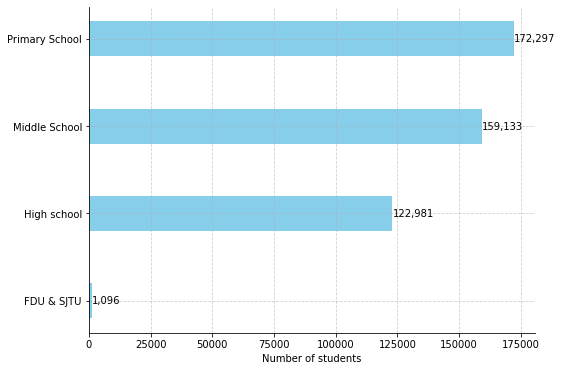

0.64% 0.69% 0.89%


In [13]:
# Different school stages

labels = ['Primary School', 'Middle School', 'High school', 'FDU & SJTU']

# Number of students admitted into primary school
n_primary = data_elementary.shape[0]

# Number of students admitted into middle school
n_middle = data_middle[data_middle['Middle High School']!= 'Not_in_shanghai'].shape[0]

# Number of students admitted into high school
n_high = data_high[data_high['High School'] != 'Not_in_shanghai'].shape[0]

# Number of students admitted into FDU or SJTU
n_fs = data_university.shape[0]

# Put together
values = [n_primary, n_middle, n_high, n_fs]

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid(linestyle='--', alpha=0.6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

bars = ax.barh(labels, values, 0.4, color='skyblue')


# Add data labels
for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
            f'{bar.get_width():,}', va='center')

# Invert the Y-axis to match the funnel order
ax.invert_yaxis()

# Set the labels and title
ax.set_xlabel('Number of students')

plt.show()

# The likelihood of all Shanghai kids admitted into FDU or SJTU.

fs_ratio_all = n_fs/n_primary

# The likelihood of Shanghai middle school kids admitted into FDU or SJTU.

fs_ratio_m = n_fs/n_middle

# The likelihood of Shanghai high school kids admitted into FDU or SJTU.

fs_ratio_h = n_fs/n_high

print("{:.2%}".format(fs_ratio_all),"{:.2%}".format(fs_ratio_m),"{:.2%}".format(fs_ratio_h))

Therefore, about **0.64%** of the students who started their primary school in 2012 were able to study at FDU or SJTU in 2024. Here, we ignored the students who did not attend a high school in Shanghai but got into FDU or SJTU in 2024.

## High School to FDU & SJTU

We first evaluate the proportion of students in **each high school category** who can enter FDU or SJTU. Moreover, we will examine how a student gets into an elite high school (i.e., `Quota` or `Self`) will affect the chance of getting into FDU or SJTU.  

To begin with, we need to join the data set of the students admitted into FDU and SJTU and that of the high school students.

In [14]:
df_high_school = pd.merge(data_high,data_university,on = ['Students ID','Name','Gender'],how = 'left')

df_high_school.head(10)

,Students ID,Name,Gender,High School,Class Number,Quota or Self,University
0,2012000000,Jiaru Yu,Female,Other high schools,NaN,NaN,NaN
1,2012000001,Qianhong Han,Female,Not_in_shanghai,NaN,NaN,NaN
2,2012000002,Jiayan Zhou,Female,Other high schools,NaN,NaN,NaN
3,2012000003,Ling Wu,Male,Not_in_shanghai,NaN,NaN,NaN
4,2012000004,Ziming Hua,Male,Other high schools,NaN,NaN,NaN
5,2012000005,Fangbo Chen,Female,Other key high schools,NaN,NaN,NaN
6,2012000006,Xuan Guan,Male,Other high schools,NaN,NaN,NaN
7,2012000007,Zhanfang Wang,Female,Other key high schools,NaN,NaN,NaN
8,2012000008,Ziyao Xu,Male,Not_in_shanghai,NaN,NaN,NaN
9,2012000009,Yongna Zhu,Female,Other high schools,NaN,NaN,NaN


Next, we plot the figure about the number and proportion of students in **each high school category** who can enter FDU or SJTU. 

Define school and admission categories for the high schools: 

In [15]:
university_list = ["Fudan University","Shanghai Jiao Tong University"]

# Define the labels for different high shcool categories
# Importantly, we need to consider quota and self differently for the elite high schools in Shanghai.
labels = ["Other schools","Other key high schools",'Tier 3 quota',\
          'Tier 3 self', 'Tier 2 quota',"Tier 2 self",'Tier 1 quota','Tier 1 self'] 

Next, we find the total number of students in each category, the number of students admitted into FDU and SJTU in each category, and the proportion of students admitted into FDU and SJTU in each category.

In [16]:
#Calculate the total number of students in each category and the number of students which are admitted into FDU or SJTU in each category
total_number = [0,0,0,0,0,0,0,0]
numbers = [0,0,0,0,0,0,0,0]

# Row selection for each high school category
mask_other_high_schools = df_high_school['High School'] == "Other high schools"
mask_other_key_high_schools = df_high_school['High School'] == "Other key high schools"
mask_high_school_list3_quota = (df_high_school['High School'].isin(high_school_list3)) & (df_high_school['Quota or Self'] == "Quota")
mask_high_school_list3_self = (df_high_school['High School'].isin(high_school_list3)) & (df_high_school['Quota or Self'] == "Self")
mask_high_school_list2_quota = (df_high_school['High School'].isin(high_school_list2)) & (df_high_school['Quota or Self'] == "Quota")
mask_high_school_list2_self = (df_high_school['High School'].isin(high_school_list2)) & (df_high_school['Quota or Self'] == "Self")
mask_high_school_list1_quota = (df_high_school['High School'].isin(high_school_list1)) & (df_high_school['Quota or Self'] == "Quota")
mask_high_school_list1_self = (df_high_school['High School'].isin(high_school_list1)) & (df_high_school['Quota or Self'] == "Self")

# Counting total numbers and matching universities for "Other high schools"
total_number[0] = mask_other_high_schools.sum()
numbers[0] = df_high_school[mask_other_high_schools & df_high_school['University'].isin(university_list)].shape[0]

# Counting total numbers and matching universities for "Other key high schools"
total_number[1] = mask_other_key_high_schools.sum()
numbers[1] = df_high_school[mask_other_key_high_schools & df_high_school['University'].isin(university_list)].shape[0]

# Counting total numbers and matching universities for Tier 3 high school quota students
total_number[2] = mask_high_school_list3_quota.sum()
numbers[2] = df_high_school[mask_high_school_list3_quota & df_high_school['University'].isin(university_list)].shape[0]

# Counting total numbers and matching universities for Tier 3 high school self students
total_number[3] = mask_high_school_list3_self.sum()
numbers[3] = df_high_school[mask_high_school_list3_self & df_high_school['University'].isin(university_list)].shape[0]

# Counting total numbers and matching universities for Tier 2 high school quota students
total_number[4] = mask_high_school_list2_quota.sum()
numbers[4] = df_high_school[mask_high_school_list2_quota & df_high_school['University'].isin(university_list)].shape[0]

# Counting total numbers and matching universities for Tier 2 high school self students
total_number[5] = mask_high_school_list2_self.sum()
numbers[5] = df_high_school[mask_high_school_list2_self & df_high_school['University'].isin(university_list)].shape[0]

# Counting total numbers and matching universities for Tier 1 high school quota students
total_number[6] = mask_high_school_list1_quota.sum()
numbers[6] = df_high_school[mask_high_school_list1_quota & df_high_school['University'].isin(university_list)].shape[0]

# Counting total numbers and matching universities for Tier 1 high school self students
total_number[7] = mask_high_school_list1_self.sum()
numbers[7] = df_high_school[mask_high_school_list1_self & df_high_school['University'].isin(university_list)].shape[0]

# Calculate the proportion of students admitted into FDU or SJTU in each category
proportion = [numbers[i]/total_number[i] for i in range(8)]

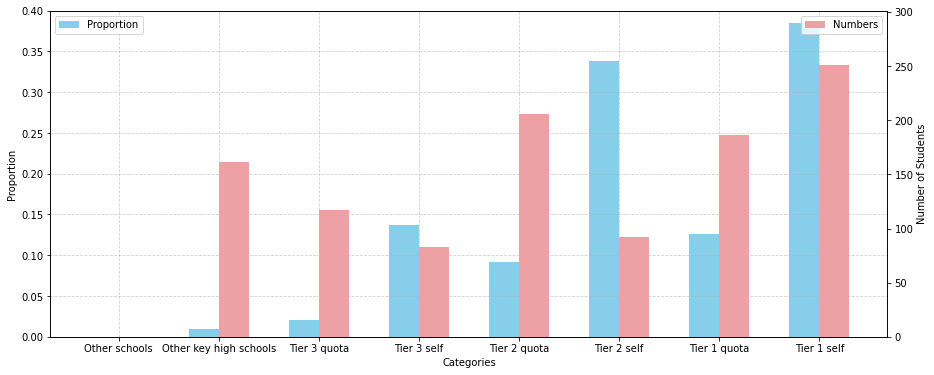

In [17]:
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1.grid(linestyle='--', alpha=0.6)
# Position of bars on x-axis
x = np.arange(len(labels))

# Bar width
width = 0.3

# Plot the proportion bars
ax1.bar(x - width/2, proportion, width, label='Proportion', color='skyblue')
ax1.set_xlabel('Categories')
ax1.set_ylabel('Proportion')
ax1.set_ylim(0, 0.4) # Limit of the y-axis
ax1.set_xticks(x)
ax1.set_xticklabels(labels)

# Create a second y-axis to plot the number bars
ax2 = ax1.twinx()
ax2.bar(x + width/2, numbers, width, label='Numbers', color='#EDA1A4')
ax2.set_ylabel('Number of Students')
ax2.set_ylim(0, max(numbers) * 1.2) # Limit of the y-axis.

# Add a legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

Two important **actional insights**, for both parents and policy makers, emerge from the analysis above:

- **Students from the elite high schools of Shanghai have a much higher chance than other students to get into FDU or SJTU.** Reversely, the majority (80%+) of the Shanghai high school students admitted into FDU or SJTU graduated from those high schools. Therefore, getting into an elite high school is crucial for a student to win a spot at FDU or SJTU, at least in Shanghai.

- **For those elite high schools, the students who were admitted through the independent selection scheme of these schools have a higher chance of getting into FDU or SJTU than those admitted through centralized quotas.** Therefore, the independent selection scheme of the elite high schools in Shanghai is more efficient than the centralized quota. 

## Middle Schools to High Schools

As shown above, entering an elite high school is crucial to enter an elite university such as FDU and SJTU. Our analysis then proceeds with understanding who can enter those high schools. Specifically, we evaluate the proportions of students from private middle schools and public middle schools who can enter elite high schools. Similarly, we will examine the students who entered elite high schools through different admission pathways (i.e., `Quota` or `Self`).

As before, we need to join the data set of the students admitted into high schools and that of the middle school students.

In [18]:
df_middle_school = pd.merge(data_middle, data_high,on = ['Students ID','Name','Gender'],how = 'left')

df_middle_school.head(10)

,Students ID,Name,Gender,Middle High School,High School,Class Number,Quota or Self
0,2012000000,Jiaru Yu,Female,Private,Other high schools,NaN,NaN
1,2012000001,Qianhong Han,Female,Private,Not_in_shanghai,NaN,NaN
2,2012000002,Jiayan Zhou,Female,Private,Other high schools,NaN,NaN
3,2012000003,Ling Wu,Male,Public,Not_in_shanghai,NaN,NaN
4,2012000004,Ziming Hua,Male,Public,Other high schools,NaN,NaN
5,2012000005,Fangbo Chen,Female,Private,Other key high schools,NaN,NaN
6,2012000006,Xuan Guan,Male,Public,Other high schools,NaN,NaN
7,2012000007,Zhanfang Wang,Female,Public,Other key high schools,NaN,NaN
8,2012000008,Ziyao Xu,Male,Public,Not_in_shanghai,NaN,NaN
9,2012000009,Yongna Zhu,Female,Public,Other high schools,NaN,NaN


First, we refer to the Tier-1, 2 , and 3 high schools as **elite high schools**, and compare the placements of private and public middle schools.

In [20]:
# Define the labels for middle shcool categories, private or public.

labels = ['Private', 'Public']

# Define the colors and legend labels for different high school categories.

colors = ['skyblue', '#EDA1A4', '#F9C08A','#FFE8CE']
legend_labels = ['Not in Shanghai', 'Other High Schools', 'Other Key High Schools','Elite High Schools']

Then, we compute the total number of students in each category.

In [22]:
# Calculate the number of students in each category

# Create masks/indicators for private and public middle schools

mask_private = df_middle_school['Middle High School'] == 'Private'
mask_public = df_middle_school['Middle High School'] != 'Private'  # Assuming non-private schools are public

# Count the total number of private and public middle school students

total_number = [
    mask_private.sum(),
    mask_public.sum()
]

# Create masks/indicators for each high school category

mask_high_school_not_in_shanghai = df_middle_school['High School'] == 'Not_in_shanghai'
mask_high_school_other = df_middle_school['High School'] == 'Other high schools'
mask_high_school_other_key = df_middle_school['High School'] == 'Other key high schools'

# Numbers for private schools
numbers_private = [
    (mask_private & mask_high_school_not_in_shanghai).sum(),
    (mask_private & mask_high_school_other).sum(),
    (mask_private & mask_high_school_other_key).sum(),
    (mask_private & ~(mask_high_school_not_in_shanghai | mask_high_school_other | mask_high_school_other_key)).sum()  # Catch-all for 'else'
]

# Numbers for public schools
numbers_public = [
    (mask_public & mask_high_school_not_in_shanghai).sum(),
    (mask_public & mask_high_school_other).sum(),
    (mask_public & mask_high_school_other_key).sum(),
    (mask_public & ~(mask_high_school_not_in_shanghai | mask_high_school_other | mask_high_school_other_key)).sum()  # Catch-all for 'else'
]

# Calculate the proportion of students in each category (private or public)
proportions = {
    'Private': [number / total_number[0] if total_number[0] > 0 else 0 for number in numbers_private],
    'Public': [number / total_number[1] if total_number[1] > 0 else 0 for number in numbers_public]
}

Finally, we could plot the placement differences for private and public middle schools.

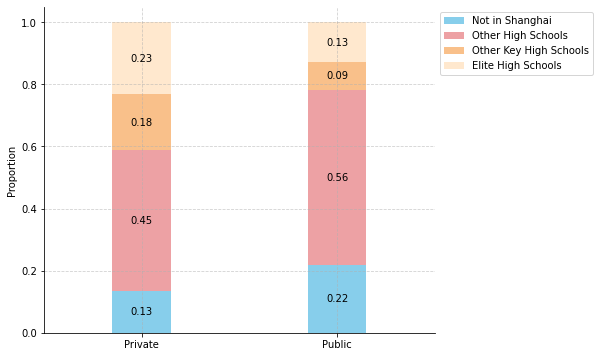

In [23]:
# Set bar width and position
width = 0.3
x = np.array([0, 1])  # X-axis positions

# Create the plot
fig, ax = plt.subplots(figsize=(7, 6))
ax.grid(linestyle='--', alpha=0.6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
bottoms = np.zeros(len(labels))  # For stacking the bars

for i, color in enumerate(colors):
    # Get the proportion for the current color
    height = [proportions[label][i] for label in labels]
    
    # Draw each color segment
    bars = ax.bar(x, height, width, color=color, bottom=bottoms, label=legend_labels[i])
    
    # Update the bottom position of each bar
    bottoms += height

# Add data labels
for i in range(len(labels)):
    current_bottom = 0
    for j, color in enumerate(colors):
        height = proportions[labels[i]][j]
        ax.text(x[i], current_bottom + height / 2, f'{height:.2f}', ha='center', va='center', color='black')
        current_bottom += height

# Add legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Set title and labels
plt.xlim(-0.5, 1.5, 1)
plt.ylabel('Proportion')
plt.xticks(x, labels)

# Show the plot
plt.show()

The results above suggest that students from private middle schools have a much higher chance of getting into good and elite high schools than their friends from public middle schools (23% vs. 13% for elite high schools and 18% vs 9% for good high schools).

Next, let's further break down the proportion of students from private and public middle schools who get into the different tiers of elite high schools via different pathways. 

In [22]:
# Define the labels for different high shcool categories

labels = ['Tier 3 quota', 'Tier 3 self', 'Tier 2 quota',"Tier 2 self",'Tier 1 quota','Tier 1 self'] 

# Count the total number of students in each middle school category 
# and the number of students which are admitted into different elite high schools category in each category

# Create masks for private and public middle schools

mask_private = df_middle_school['Middle High School'] == 'Private'
mask_public = df_middle_school['Middle High School'] != 'Private'

# Count the total number of private and public students

total_number = [
    mask_private.sum(),
    mask_public.sum()
]

# Create masks for high school categories and quota/self

mask_quota = df_middle_school['Quota or Self'] == 'Quota'
mask_self = df_middle_school['Quota or Self'] == 'Self'

mask_high_school_list3 = df_middle_school['High School'].isin(high_school_list3)
mask_high_school_list2 = df_middle_school['High School'].isin(high_school_list2)
mask_high_school_list1 = df_middle_school['High School'].isin(high_school_list1)

# Numbers for private schools

number_private = [
    (mask_private & mask_high_school_list3 & mask_quota).sum(),
    (mask_private & mask_high_school_list3 & mask_self).sum(),
    (mask_private & mask_high_school_list2 & mask_quota).sum(),
    (mask_private & mask_high_school_list2 & mask_self).sum(),
    (mask_private & mask_high_school_list1 & mask_quota).sum(),
    (mask_private & mask_high_school_list1 & mask_self).sum()
]

# Numbers for public schools

number_public = [
    (mask_public & mask_high_school_list3 & mask_quota).sum(),
    (mask_public & mask_high_school_list3 & mask_self).sum(),
    (mask_public & mask_high_school_list2 & mask_quota).sum(),
    (mask_public & mask_high_school_list2 & mask_self).sum(),
    (mask_public & mask_high_school_list1 & mask_quota).sum(),
    (mask_public & mask_high_school_list1 & mask_self).sum()
]

# Calculate the proportion of students in each category

proportions_private = [number / total_number[0] if total_number[0] > 0 else 0 for number in number_private]
proportions_public = [number / total_number[1] if total_number[1] > 0 else 0 for number in number_public]

We then plot our analysis results.

23.25% 4.12%


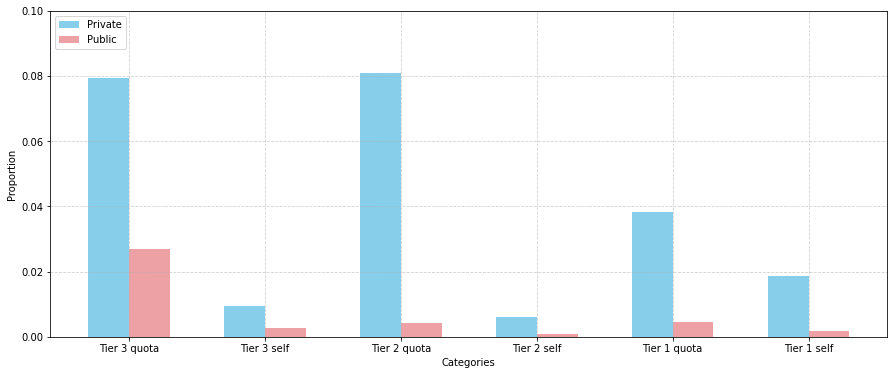

In [26]:
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1.grid(linestyle='--', alpha=0.6)

# Position of bars on x-axis

x = np.arange(len(labels))

# Bar width

width = 0.3

# Plot the proportion bars

ax1.bar(x - width/2, proportions_private, width, label='Private', color='skyblue')
ax1.bar(x + width/2, proportions_public, width, label='Public', color='#EDA1A4')
ax1.set_xlabel('Categories')
ax1.set_ylabel('Proportion')
ax1.set_ylim(0, 0.1)
ax1.set_xticks(x)
ax1.set_xticklabels(labels)

# Add a legend

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

print("{:.2%}".format(sum(proportions_private)),"{:.2%}".format(sum(proportions_public)))

It is clear that **private middle schools dominate public middle schools** in all high school categories and admission pathways, especially for the self-admission channel.

Importantly, high schools are no longer under the compulsory education in China. Therefore, **all students** need to take the high school entrance exam to get into the, good or bad, public high schools in Shanghai. Top **23.25%** of the students from **private primary schools** could get into a top-tier elite high school in Shanghai, whereas only **4.12%** of the students from **public primary schools** could do so. 

## Elementary School to Middle Schools

Next, we repeat the exercise above to evaluate the proportion of students in private or public primary schools who get into middle schools.

As before, we need to join the data set of the students admitted into middle schools and that of the elementary school students.

In [28]:
df_elementary_school = pd.merge(data_elementary, data_middle,on = ['Students ID','Name','Gender'],how = 'left')

df_elementary_school.head(10)

,Students ID,Name,Gender,Elementary School,Middle High School
0,2012000000,Jiaru Yu,Female,Private,Private
1,2012000001,Qianhong Han,Female,Public,Private
2,2012000002,Jiayan Zhou,Female,Public,Private
3,2012000003,Ling Wu,Male,Public,Public
4,2012000004,Ziming Hua,Male,Public,Public
5,2012000005,Fangbo Chen,Female,Public,Private
6,2012000006,Xuan Guan,Male,Public,Public
7,2012000007,Zhanfang Wang,Female,Public,Public
8,2012000008,Ziyao Xu,Male,Public,Public
9,2012000009,Yongna Zhu,Female,Public,Public


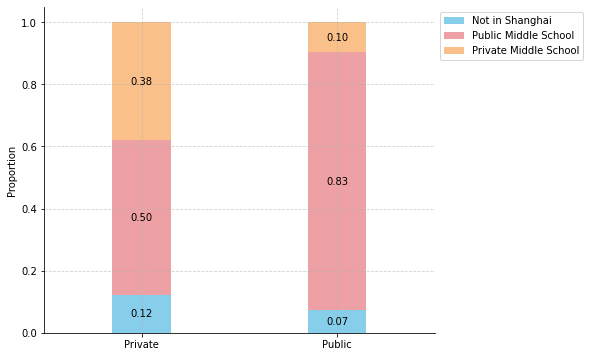

In [29]:
#Define the labels for different middle shcool categories

labels = ['Private', 'Public']

# Define the colors and legend labels for different high school categories
colors = ['skyblue', '#EDA1A4', '#F9C08A']
legend_labels = ['Not in Shanghai', 'Public Middle School', 'Private Middle School']

# Create masks for private and public elementary schools

mask_private = df_elementary_school['Elementary School'] == 'Private'
mask_public = df_elementary_school['Elementary School'] != 'Private'  

# Count the total number of private and public students

total_number = [
    mask_private.sum(),
    mask_public.sum()
]

# Create masks for middle school categories

mask_middle_not_in_shanghai = df_elementary_school['Middle High School'] == 'Not_in_shanghai'
mask_middle_public = df_elementary_school['Middle High School'] == 'Public'

# Numbers for private elementary school students

numbers_private = [
    (mask_private & mask_middle_not_in_shanghai).sum(),
    (mask_private & mask_middle_public).sum(),
    (mask_private & ~(mask_middle_not_in_shanghai | mask_middle_public)).sum()  # Else case
]

# Numbers for public elementary school students

numbers_public = [
    (mask_public & mask_middle_not_in_shanghai).sum(),
    (mask_public & mask_middle_public).sum(),
    (mask_public & ~(mask_middle_not_in_shanghai | mask_middle_public)).sum()  # Else case
]

# Calculate the proportion of students in each category

proportions = {
    'Private': [number / total_number[0] if total_number[0] > 0 else 0 for number in numbers_private],
    'Public': [number / total_number[1] if total_number[1] > 0 else 0 for number in numbers_public]
}

# Set bar width and position

width = 0.3
x = np.array([0, 1])  # X-axis positions

# Create the plot
fig, ax = plt.subplots(figsize=(7, 6))
ax.grid(linestyle='--', alpha=0.6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
bottoms = np.zeros(len(labels))  # For stacking the bars

for i, color in enumerate(colors):
    # Get the proportion for the current color
    height = [proportions[label][i] for label in labels]
    
    # Draw each color segment
    bars = ax.bar(x, height, width, color=color, bottom=bottoms, label=legend_labels[i])
    
    # Update the bottom position of each bar
    bottoms += height

# Add data labels
for i in range(len(labels)):
    current_bottom = 0
    for j, color in enumerate(colors):
        height = proportions[labels[i]][j]
        ax.text(x[i], current_bottom + height / 2, f'{height:.2f}', ha='center', va='center', color='black')
        # ax.text(x[i], current_bottom + height / 2 - 0.03, f'{(int(number_temp))}', ha='center', va='center', color='black')
        current_bottom += height

# Add legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Set title and labels
plt.xlim(-0.5, 1.5, 1)
plt.ylabel('Proportion')
plt.xticks(x, labels)

# Show the plot
plt.show()


As shown above, private primary school students have a **38%** chance getting into a private middle school, about 4 times as much as the chance of a public primary school student getting into a private middle school. 

Putting everything together, we observe 2 clearly divergent pathways for a kid from Shanghai. 

   <blockquote> <b>Pathway 1: Attending a Public Primary School.</b> From a public elementary school with 180,000 students, the journey continues to a public middle school with 160,000 students. If you choose to stay in Shanghai for the high school entrance exam (中考) and your exam score doesn't place you in the top 20% of your peers, you will likely move on to a vocational school (中专) with 110,000 students or a non-elite high school. Following this path, the chances of being admitted to FDU or SJTU will directly shrink to zero.

If you rank slightly higher in the high school entrance exam, falling between the top 6% and top 20% (which is already pretty good), you'll proceed from a public middle school to a regular municipal key high school ranked outside the top 30, with a student body of 20,000. At this point, the probability of getting into FDU or SJTU is no longer zero but only <b>0.88%</b> — a slight improvement over the <b>0.64%</b> for all students of the cohort, but still very limited.

If you rank even higher, within the top 6% of students in public middle schools, two-thirds of those students will enter Tier-3 elite high schools (a group of Shanghai high schools ranked between 16 and 30) in their centralized admissions classes (i.e., "quota" in our data set). At this point, the overall admission rate into FDU or SJTU rises further to <b>2.3%</b>.

Regardless, the road ahead only gets narrower and narrower.
</blockquote>
    
   <blockquote> <b>Pathway 2: Attending a Private Primary School.</b>  A student from a private elementary school has a decent chance of getting into a private middle school, and then being independently admitted into tier-1 and tier-2 elite high schools in Shanghai, ranked roughly top 15. The final step on this path has an admission rate of over <b>30%</b> into FDU and SJTU. While it's also possible to take this path from a public middle school, the probability is much lower compared to coming from a private middle school. To be precise, the chances of entering this pathway from a private middle school are more than <b>5 times higher</b> than from a public middle school.

If a student doesn't perform well in the high school entrance exam, and ends up in a tier-3 high school (ranked 16-30), private school students are still more likely to enter these schools' independent enrollment classes ("self" in our data set) rather than the regular admissions classes ("quota" in our data set). One should note that in these independent enrollment classes, the probability of being admitted into FDU or SJTU is still more than <b>four times</b> that of their peers in regular classes.

Unlike students from public middle schools who need to rank in the top <b>6%</b> in the high school entrance exam to maintain their chances of getting into FDU and SJTU, students from private middle schools only need to rank in the top 25% among their private-school peers to achieve the same goal.

That said, getting into a private primary school in Shanghai is very competitive in 2012. The kids have to survive very tough admission tests to be admitted.
</blockquote>








Let’s revisit these two pathways of education in Shanghai. By examining these two entirely different paths, we can see that they represent two completely different educational experiences and philosophies.

- From an educational experience standpoint, the **"broad first, narrow later"** path represents **"delayed competition."**

If a student follows this path, then throughout the entire 9 years of compulsory education, none of the exams really matter except for the high school entrance exam (中考). Among the 120,000 students taking this exam from public middle schools, whether by luck or ability, students must rank in the top **5%** to obtain a direct quota for a key high school in their district. Then, in the highly competitive classes made up of **6,641** students from the elite high schools, only the top **2%** (about **156** students) will ultimately be admitted into FDU or SJTU.

- The **"narrow first, broad later"** path represents **"early competition."**

These students need to engage in **intense competition** starting from kindergarten and lower elementary grades to have a chance of being selected by top private middle schools, such as Huayu or Lansheng, by the time they are in fourth grade. Once selected, the intensity of competition they face significantly decreases, and their future path to top universities is almost guaranteed eight years later. For them, the high school and college entrance exams are merely formalities, instead of critical points. They no longer need to bear the risk of such low-differentiation exams and can engage in more comprehensive learning and participate in a variety of interesting activities.

One path allows students to truly **"lighten their academic load"** during elementary and middle school, but they face the intense "single-log bridge" competition in their high school lives. The other path allows students to know by fourth grade that their future is largely set, enabling them to participate in more valuable activities early on without affecting their chances of being admitted to top universities in China.

In light of this contrast, the intense academic pressure that Shanghai families place on their children starting from elementary school seems somewhat inevitable. We all want the chance to follow the second path and escape from meaningless exams early on.

From an educational philosophy standpoint, the first path is the direction **current education reform** efforts are aiming towards. The goal is to promote educational equity, reduce academic competition, and balance the quality of education. More importantly, it seeks to **delay the selection process** and **reduce competition** based on academic performance, **minimizing competition in elementary and middle schools**. Students are placed into good middle schools by **lottery**, and **simpler high school entrance exams** increase the uncertainty of entering a good high school. Hence, students following this path face the real competition only in high school. Policy changes such as **lotteries**, **equal allocation of elite high school quota**, banning stratified teaching, and increasingly simpler high school entrance exams are all part of such effort.

The second path, however, reflects the **traditional selection method** that Shanghai's high schools and middle schools have long been accustomed to. This method aims to complete the selection process as early as possible and end competition earlier. As early as **Grade 4**, top students are identified, and they are allowed to develop freely, naturally progressing to top schools, rather than gathering a group of **"test champions"** to compete for a few winners. The continued favoritism of top high schools in Shanghai shown towards students from elite private middle schools demonstrates the ongoing endorsement of this selection method.

Finally, we will address another question:

- Why is the chance of getting into FDU and SJTU **4 times higher** for the independently selected students than the students admitted with centralized quotas, even they are both from elite high schools in Shanghai?

## Self-Enrollment vs. Centralized Quota

Our analysis above suggests that students admitted into elite high schools through their self-recruitment schemes have a (much) higher chance of getting into SJTU & FDU. One may wonder why this is the case. 

We examine the data from Nanyang Model High School (南洋模范中学) which is a **Tier-1 high shool** in Shanghai. We plot the replationship between the proportion of students who are admitted into FDU and SJTU and the proportion of students who were admitted through the self-enrollment scheme for each class.

Text(0, 0.5, 'Proportion of FDU or SJTU in the class')

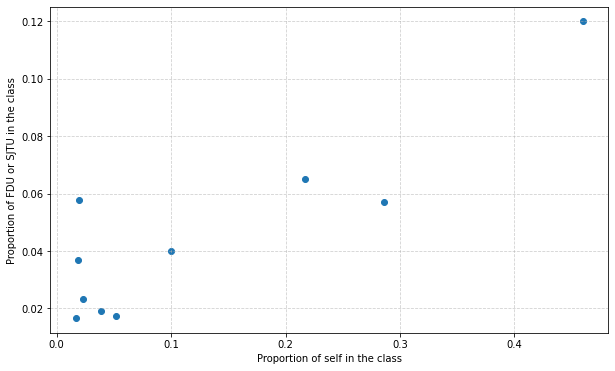

In [32]:
#class number list

class_number = [1,2,3,4,5,6,7,8,9,10]

# The total number of students in each class of Shanghai Nanyang Model High School

number_total = [0 for i in range(10)]

# The number of students admitted by self-enrollment of high scholls in each class of Shanghai Nanyang Model High School

number_self = [0 for i in range(10)]

# The number of students admitted into FDU or SJTU in each class of Shanghai Nanyang Model High School

number_university = [0 for i in range(10)]

# The for loop below is not the most efficient way of counting the students. You may directly use row selection.

for i in range(df_high_school.shape[0]):
    temp_high_school= df_high_school['High School'][i]
    temp_class_number = df_high_school['Class Number'][i]
    temp_quota_self = df_high_school['Quota or Self'][i]
    if temp_high_school == "Shanghai Nanyang Model High School":
        number_total[int(temp_class_number)-1] += 1
        if df_high_school['Quota or Self'][i] == 'Self':
            number_self[int(temp_class_number)-1] += 1
        if df_high_school['University'][i] in university_list:
            number_university[int(temp_class_number)-1] += 1

# The ratio of students admitted into FDU or SJTU in each class
ratio1 = [number_self[j]/number_total[j] for j in range(10)]
ratio2 = [number_university[j]/number_total[j] for j in range(10)]
plt.figure(figsize=(10,6))
plt.grid(linestyle='--', alpha=0.6)
plt.scatter(ratio1,ratio2)
plt.xlabel('Proportion of self in the class')
plt.ylabel('Proportion of FDU or SJTU in the class')

The figure clearly revealss a strong correlation between the proportion of self-enrolled students and the proportion of students who get admitted into FDU and SJTU in each class, suggesting the self-enrollment scheme of elite high schools can more electively select the best students than the centralized quota.